In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [146]:
df = pd.read_csv('heart.csv',header='infer')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Attribute Information:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [147]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [149]:
df.shape

(303, 14)

In [150]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### no missing data


<function matplotlib.pyplot.show(close=None, block=None)>

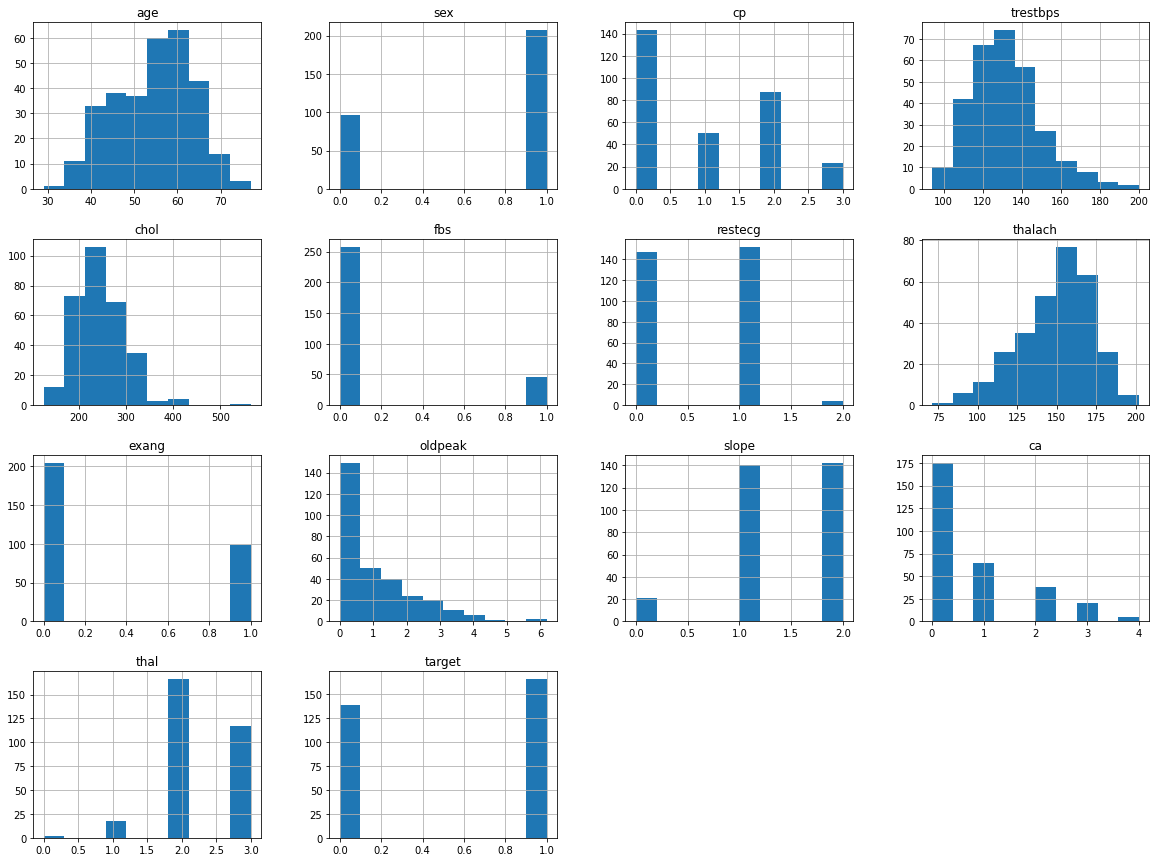

In [151]:
df.hist(figsize=(20,15))
plt.show

Text(0.5, 1.0, 'patients distribution,')

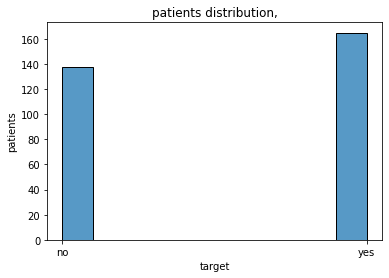

In [152]:
sns.histplot( df.target )
sns.color_palette("Paired")
plt.ylabel('patients')
plt.xticks([0,1],["no","yes"])
plt.title('patients distribution,')


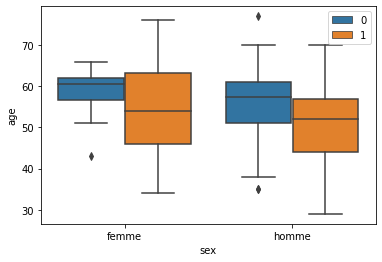

In [153]:
sns.boxplot(x = "sex" , y = 'age' ,hue= 'target', data=df)
plt.xticks([0,1],["femme" , "homme"])
plt.legend()

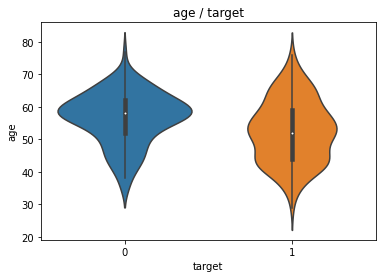

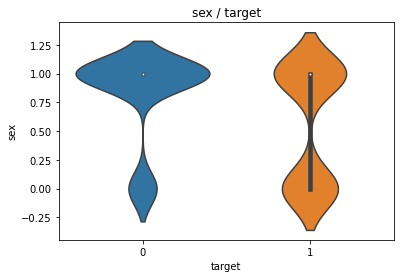

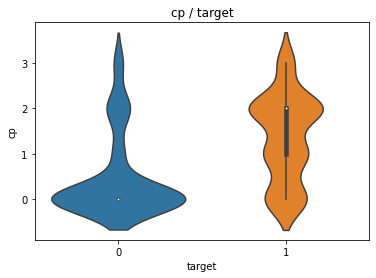

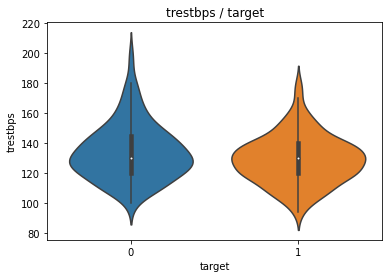

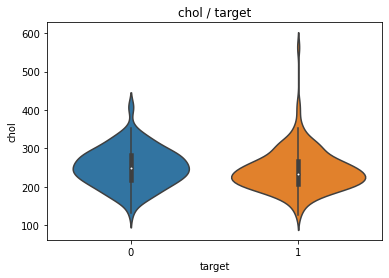

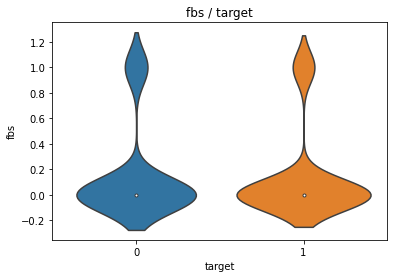

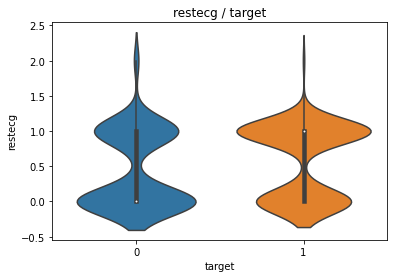

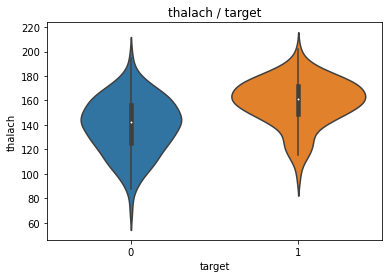

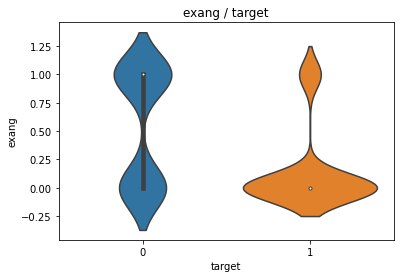

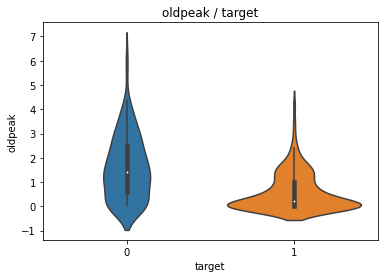

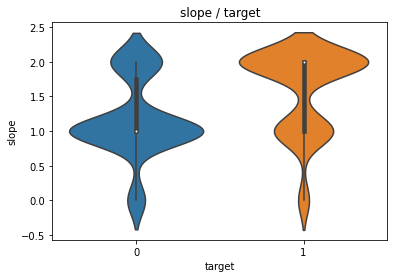

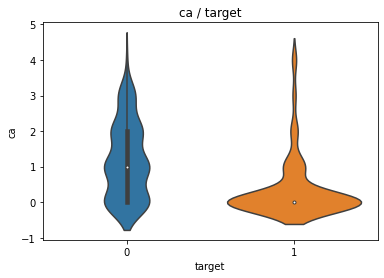

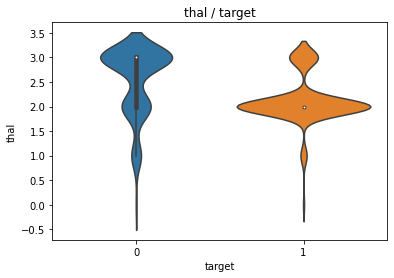

In [154]:
for column in list(df.columns)[:-1] : 
    sns.violinplot(x = "target" , y = column , data=df )
    plt.title(column + " / target" )
    plt.show()
    

## we notice from the previous graphs that the features which show a clear difference between the target's distribution classes are 
- thal
- ca 
- oldpeak 
- cp 
- slope

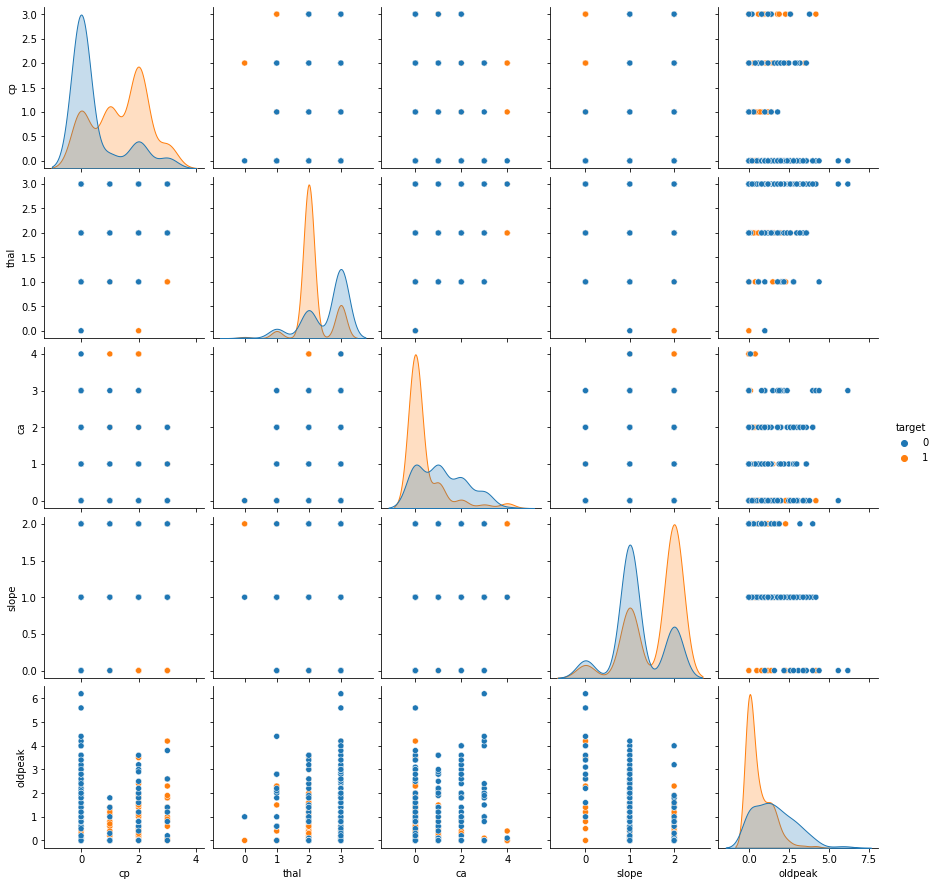

In [155]:

sns.pairplot(df[["cp",'thal',"ca","slope","oldpeak","target"]] , hue="target" )
plt.show()

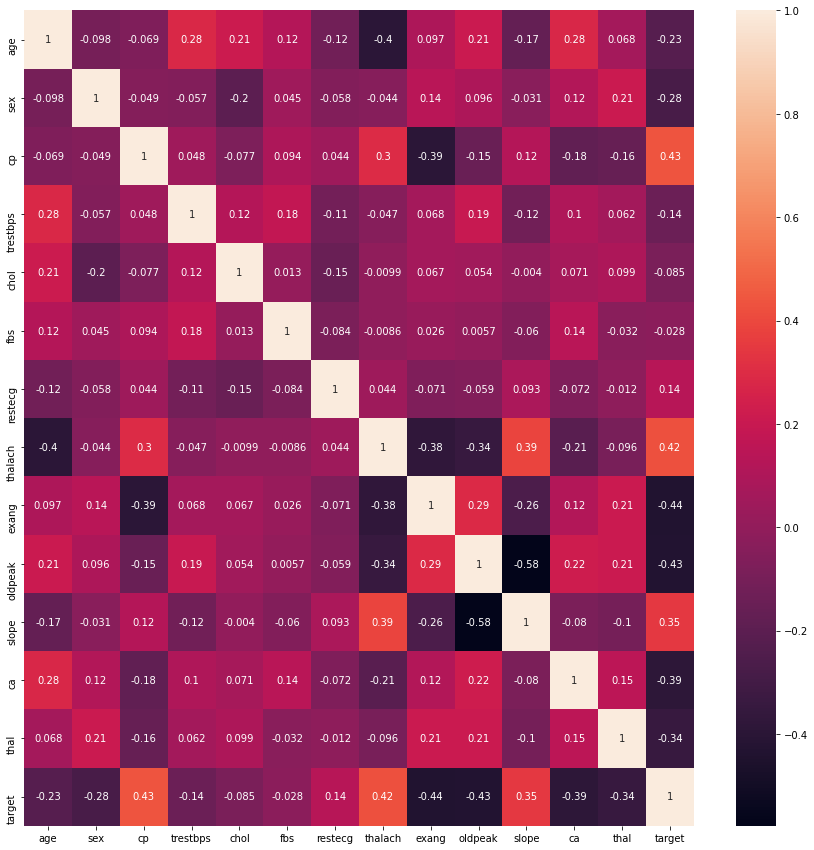

In [156]:
correlation_mat = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_mat, annot = True)

plt.show()

In [157]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import random

#features extraction
x = df[["cp",'thal',"ca","slope","oldpeak"]]
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.87


### Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

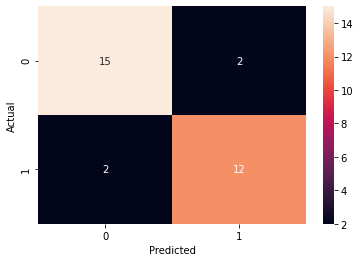

In [158]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### Area under the curve

In [159]:
pred_prob = logreg.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print("AUC" ,auc_score)

AUC 0.8571428571428571


### ROC

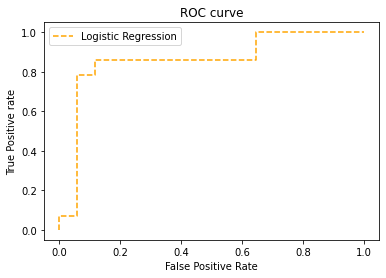

In [160]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()

## Random feature selection 


in the code below we tried to randomly select n_features n_itr times , calculate the accuracy each time and save the best result 

In [211]:
acc0 = 0
r0 = []
n_features = 3
n_itr =300

for i in range(0,n_itr) : 
    randomlist = random.sample(range(0,len(df.columns)-1), n_features)
    f_list = []
    for i in randomlist : 
        f_list.append(df.columns[i])
    x = df[f_list]
    y = df['target']

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)  #splitting data with test size of 25%

    logreg = LogisticRegression( solver='lbfgs')   #build our logistic model
    logreg.fit(x_train, y_train)  #fitting training data
    y_pred  = logreg.predict(x_test)    #testing model’s performance
    acc = logreg.score(x_test, y_test)
    if acc > acc0 : 
        acc0 = acc
        r0 = randomlist
    
print("Accuracy={:.2f}".format(acc0))
print("selected features : " ,f_list)

Accuracy=0.94
selected features :  ['exang', 'restecg', 'thal']


### Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

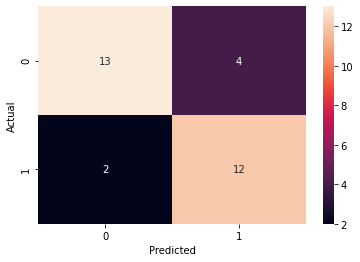

In [212]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [214]:
pred_prob = logreg.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print("AUC" ,auc_score)

AUC 0.8865546218487395


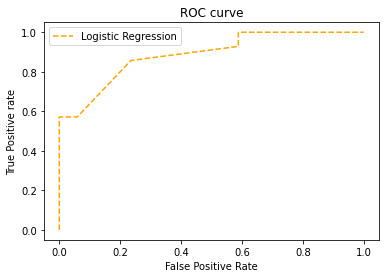

In [215]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()